Missing Data  
·       Bargraph of Missing Data by Target Variable  
·       Line graph of missing data by date  
·       Map of missing data by state  

Other data exploration  
·       Scatter matrix of continuous variables  

PCA  
·       Barchart of variables explaining greatest principle compontents (decreasing order) for first 3(?) components 
·       Histograms and by-state maps of select components that drive variance  

Evaluation  
·       For select counties, chart predicted mobility against observed mobility


In [5]:
import build_master_df
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# df = build_master_df.build_df()
df = pd.read_csv('full_df.csv')
df.head(5)

,StateName,CountyName,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,fips,...,int_date_foreign travel ban,voteshare_dem,voteshare_rep,totalvotes,_merge,pop_density,cases_per_pop,cases_per_area,deaths_per_pop,deaths_per_area
0,ALABAMA,AUTAUGA COUNTY,2020-02-15,5.0,7.0,NaN,NaN,-4.0,NaN,1001,...,0.0,0.237697,0.727666,24973.0,both,NaN,0.0,NaN,0.0,NaN
1,ALABAMA,AUTAUGA COUNTY,2020-02-16,0.0,1.0,-23.0,NaN,-4.0,NaN,1001,...,0.0,0.237697,0.727666,24973.0,both,NaN,0.0,NaN,0.0,NaN
2,ALABAMA,AUTAUGA COUNTY,2020-02-17,8.0,0.0,NaN,NaN,-27.0,5.0,1001,...,0.0,0.237697,0.727666,24973.0,both,NaN,0.0,NaN,0.0,NaN
3,ALABAMA,AUTAUGA COUNTY,2020-02-18,-2.0,0.0,NaN,NaN,2.0,0.0,1001,...,0.0,0.237697,0.727666,24973.0,both,NaN,0.0,NaN,0.0,NaN
4,ALABAMA,AUTAUGA COUNTY,2020-02-19,-2.0,0.0,NaN,NaN,2.0,0.0,1001,...,0.0,0.237697,0.727666,24973.0,both,367361.656924,0.0,0.0,0.0,0.0


Text(0.5,1,'Missing Data by Target Variable')

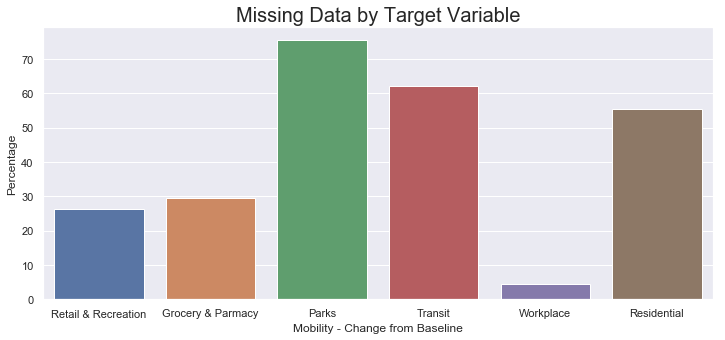

In [6]:
sns.set(rc={'figure.figsize':(12, 5)})
Missing_by_Target = df[[c for c in df.columns if c.endswith('baseline')]].isnull().sum() / df.shape[0] * 100
Missing_by_Target.index = ['Retail & Recreation', 'Grocery & Parmacy', 'Parks', 'Transit', 'Workplace', 'Residential']
Missing_by_Target = Missing_by_Target.to_frame('Percentage')
ax = sns.barplot(x=Missing_by_Target.index, y='Percentage', data=Missing_by_Target)
plt.xlabel("Mobility - Change from Baseline")
plt.title('Missing Data by Target Variable', fontsize=20)

Text(0.5,1,'Missing Data by Mobility Category - Change from Baseline')

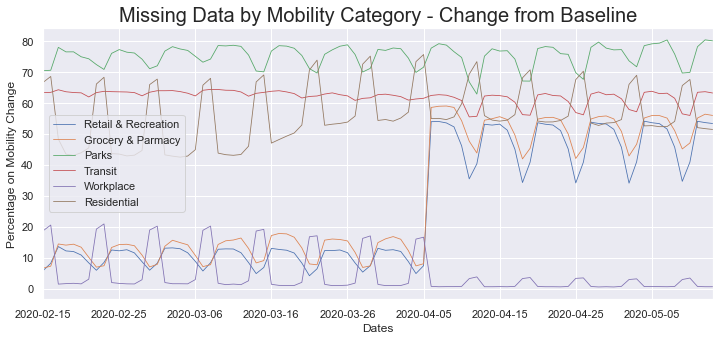

In [7]:
df1 = df[df['retail_and_recreation_percent_change_from_baseline'].isnull()].groupby('date')['fips'].count()/ df.groupby('date')['fips'].count() * 100
df1.plot(linewidth=0.8, label='Retail & Recreation')
df2 = df[df['grocery_and_pharmacy_percent_change_from_baseline'].isnull()].groupby('date')['fips'].count() / df.groupby('date')['fips'].count() * 100
df2.plot(linewidth=0.8, label='Grocery & Parmacy')
df3 = df[df['parks_percent_change_from_baseline'].isnull()].groupby('date')['fips'].count() / df.groupby('date')['fips'].count() * 100
df3.plot(linewidth=0.8, label='Parks')
df4 = df[df['transit_stations_percent_change_from_baseline'].isnull()].groupby('date')['fips'].count() / df.groupby('date')['fips'].count() * 100
df4.plot(linewidth=0.8, label='Transit')
df5 = df[df['workplaces_percent_change_from_baseline'].isnull()].groupby('date')['fips'].count() / df.groupby('date')['fips'].count() * 100
df5.plot(linewidth=0.8, label='Workplace')
df6 = df[df['residential_percent_change_from_baseline'].isnull()].groupby('date')['fips'].count() / df.groupby('date')['fips'].count() * 100
df6.plot(linewidth=0.8, label='Residential')
leg = plt.legend()
plt.xlabel("Dates")
plt.ylabel("Percentage on Mobility Change")
plt.title('Missing Data by Mobility Category - Change from Baseline', fontsize=20)

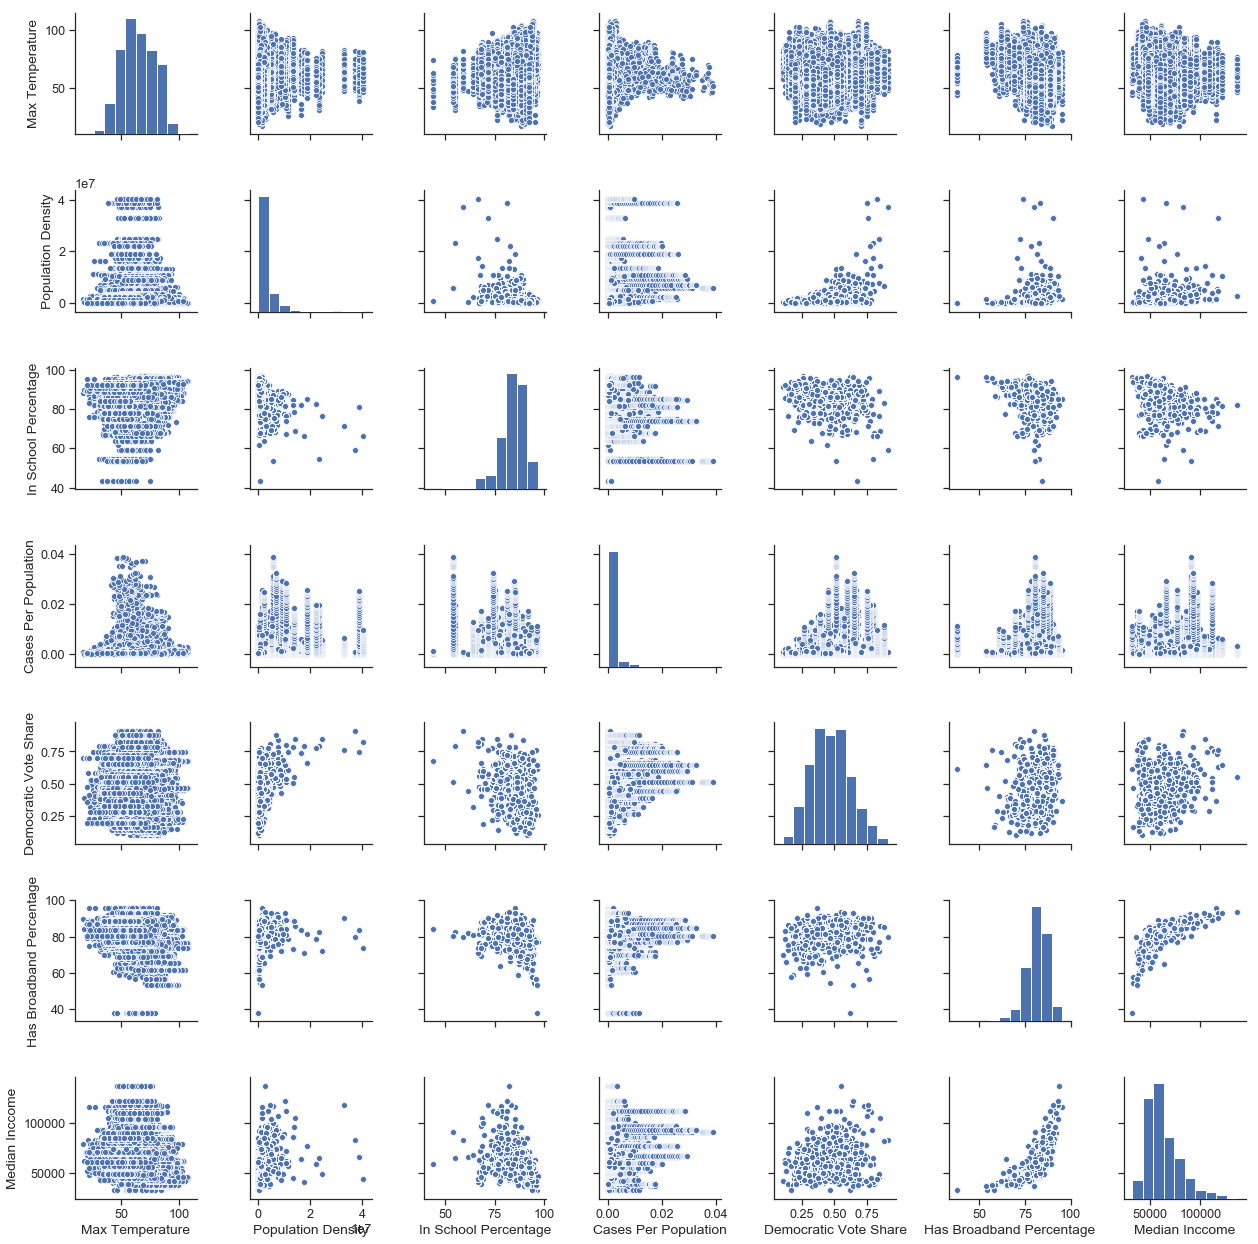

In [38]:
df_matrix = df.dropna()
df_matrix = df_matrix[['TMAX', 'pop_density', 'in_school_pct', 'cases_per_pop', 'voteshare_dem', 'has_broadband_pct', 'med_inc']]
df_matrix.columns = ['Max Temperature', 'Population Density', 'In School Percentage', 'Cases Per Population',
                     'Democratic Vote Share', 'Has Broadband Percentage', 'Median Inccome']
sns.set(style="ticks", color_codes=True, font_scale=1.15)
sns.pairplot(df_matrix, vars=df_matrix.columns)

In [9]:
import geopandas as gpd
shape = gpd.read_file('../data_raw/tl_2019_us_county/tl_2019_us_county.shp')
shape = shape[['GEOID', 'NAMELSAD', 'geometry']]
shape.NAMELSAD = shape.NAMELSAD.str.upper()
shape.head(3)

,GEOID,NAMELSAD,geometry
0,31039,CUMING COUNTY,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."
1,53069,WAHKIAKUM COUNTY,"POLYGON ((-123.43639 46.23820, -123.44759 46.2..."
2,35011,DE BACA COUNTY,"POLYGON ((-104.56739 33.99757, -104.56772 33.9..."


In [10]:
df = df[df.iloc[:, 3:9].isnull().any(axis=1)]
df = df.groupby('CountyName').count()

In [11]:
df = df.merge(shape, left_on=['CountyName'], right_on='NAMELSAD', how="right")
df_inter = df.fillna(df.max())
gdf = gpd.GeoDataFrame(df_inter, geometry=df_inter.geometry)

In [12]:
gdf.head(3)

,StateName,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,fips,NAICS Accommodation and food services,...,totalvotes,_merge,pop_density,cases_per_pop,cases_per_area,deaths_per_pop,deaths_per_area,GEOID,NAMELSAD,geometry
0,89.0,89.0,43.0,51.0,0.0,0.0,89.0,0.0,89.0,89.0,...,89.0,89.0,89.0,89.0,89.0,89.0,89.0,45001,ABBEVILLE COUNTY,"POLYGON ((-82.43108 34.40828, -82.43067 34.408..."
1,89.0,89.0,77.0,88.0,0.0,89.0,89.0,62.0,89.0,89.0,...,89.0,89.0,89.0,89.0,89.0,89.0,89.0,22001,ACADIA PARISH,"POLYGON ((-92.58549 30.20339, -92.58623 30.203..."
2,89.0,89.0,63.0,89.0,0.0,0.0,89.0,43.0,89.0,89.0,...,89.0,89.0,89.0,89.0,89.0,89.0,89.0,51001,ACCOMACK COUNTY,"POLYGON ((-75.64821 37.94686, -75.64770 37.946..."


Text(199.125,0.5,'Latitude')

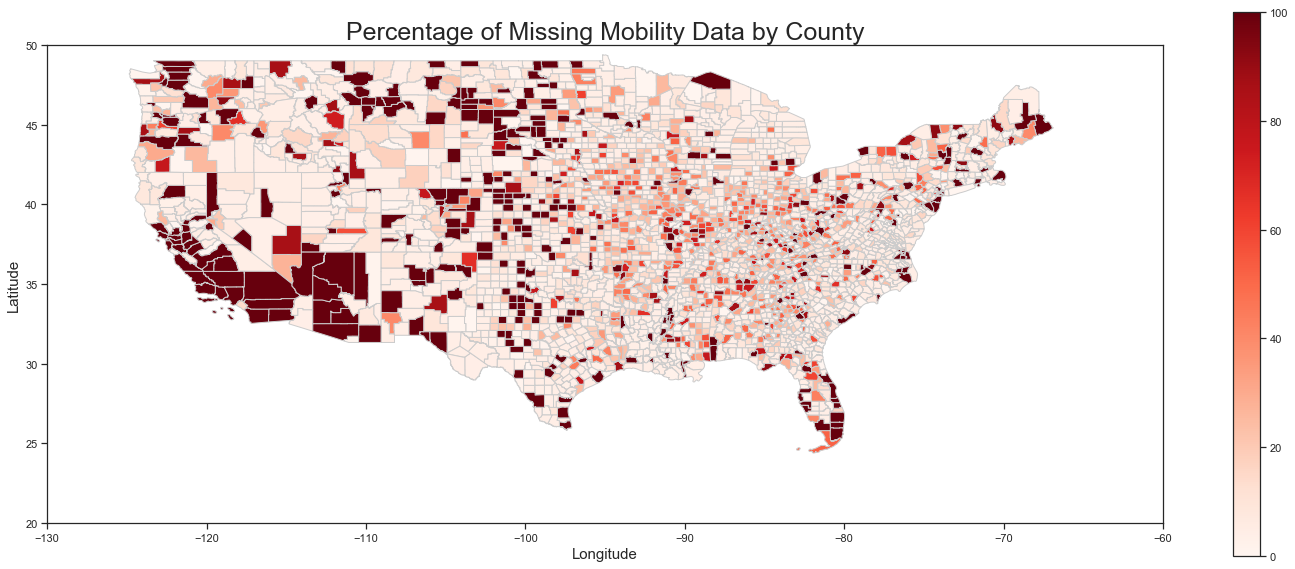

In [13]:
fig, ax = plt.subplots(1, figsize=(25, 10))
gdf.plot(column='fips', cmap='Reds', ax=ax, edgecolor='0.8')
ax.set_title('Percentage of Missing Mobility Data by County', fontsize=25)
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0, vmax=100))
sm._A = []
cbar = fig.colorbar(sm)
ax.axis((-130, -60, 20, 50))
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)

In [1]:
df = pd.read_csv('full_df.csv')
df_line = df[['date', 'fips', 'retail_and_recreation_percent_change_from_baseline',
    'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline',
    'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline',
    'residential_percent_change_from_baseline', 'TMAX']]

In [2]:
df_line.set_index('date', inplace=True)
df_line.columns = ["fips", "Retail and Recreation", "Grocery and Pharmacy", "Parks", "Transit Stations",
                   "Workplaces", "Residential", "Max Temperature"]

In [5]:
sns.set(rc={'figure.figsize':(15, 6)})

Text(0.5,1,'Mobility Change, Max Temperature and Deaths per Population in Orange County')

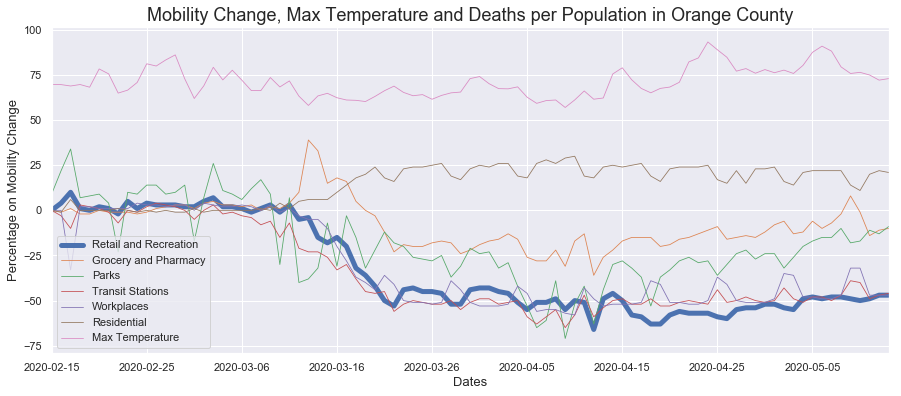

In [67]:
df_orange = df_line[df_line['fips'] == 6059]
df_orange = df_orange[["Retail and Recreation", "Grocery and Pharmacy", "Parks",
                       "Transit Stations", "Workplaces", "Residential", "Max Temperature"]]
fig, ax = plt.subplots()
df_orange[["Retail and Recreation"]].plot(ax=ax, linewidth=5)
df_orange[["Grocery and Pharmacy"]].plot(ax=ax, linewidth=0.8)
df_orange[["Parks"]].plot(ax=ax, linewidth=0.8)
df_orange[["Transit Stations"]].plot(ax=ax, linewidth=0.8)
df_orange[["Workplaces"]].plot(ax=ax, linewidth=0.8)
df_orange[["Residential"]].plot(ax=ax, linewidth=0.8)
df_orange[["Max Temperature"]].plot(ax=ax, linewidth=0.8)
plt.xlabel("Dates", fontsize=13)
plt.ylabel("Percentage on Mobility Change", fontsize=13)
plt.title('Mobility Change, Max Temperature and Deaths per Population in Orange County', fontsize=18)

Text(0.5,1,'Mobility Change, Max Temperature and Deaths per Population in Brooklyn County')

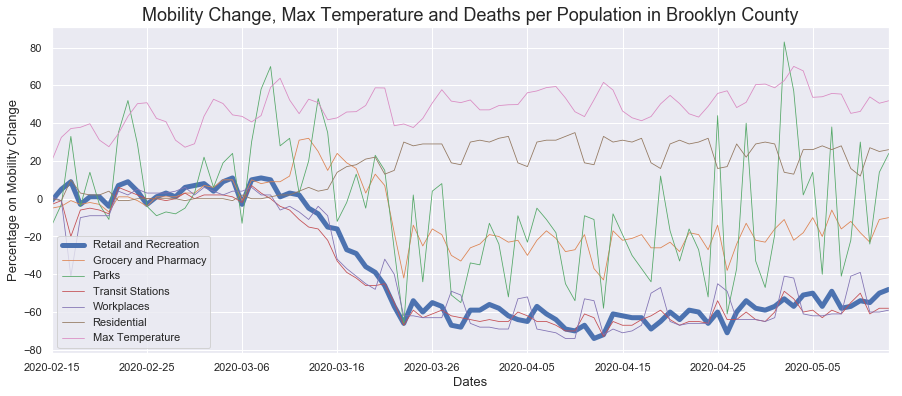

In [68]:
df_brooklyn = df_line[df_line['fips'] == 36047]
df_brooklyn = df_brooklyn[["Retail and Recreation", "Grocery and Pharmacy", "Parks",
                       "Transit Stations", "Workplaces", "Residential", "Max Temperature"]]
fig, ax = plt.subplots()
df_brooklyn[["Retail and Recreation"]].plot(ax=ax, linewidth=5)
df_brooklyn[["Grocery and Pharmacy"]].plot(ax=ax, linewidth=0.8)
df_brooklyn[["Parks"]].plot(ax=ax, linewidth=0.8)
df_brooklyn[["Transit Stations"]].plot(ax=ax, linewidth=0.8)
df_brooklyn[["Workplaces"]].plot(ax=ax, linewidth=0.8)
df_brooklyn[["Residential"]].plot(ax=ax, linewidth=0.8)
df_brooklyn[["Max Temperature"]].plot(ax=ax, linewidth=0.8)
plt.xlabel("Dates", fontsize=13)
plt.ylabel("Percentage on Mobility Change", fontsize=13)
plt.title('Mobility Change, Max Temperature and Deaths per Population in Brooklyn County', fontsize=18)

Text(0.5,1,'Mobility Change, Max Temperature and Deaths per Population in Cook County')

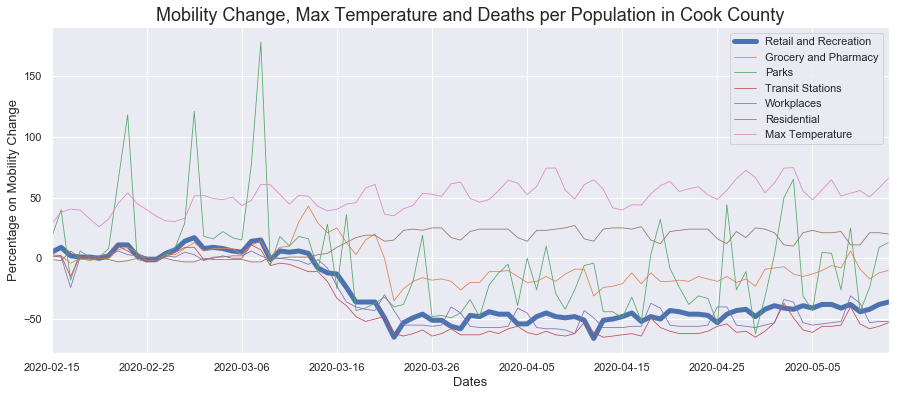

In [6]:
df_cook = df_line[df_line['fips'] == 17031]
df_cook = df_cook[["Retail and Recreation", "Grocery and Pharmacy", "Parks",
                       "Transit Stations", "Workplaces", "Residential", "Max Temperature"]]
fig, ax = plt.subplots()
df_cook[["Retail and Recreation"]].plot(ax=ax, linewidth=5)
df_cook[["Grocery and Pharmacy"]].plot(ax=ax, linewidth=0.8)
df_cook[["Parks"]].plot(ax=ax, linewidth=0.8)
df_cook[["Transit Stations"]].plot(ax=ax, linewidth=0.8)
df_cook[["Workplaces"]].plot(ax=ax, linewidth=0.8)
df_cook[["Residential"]].plot(ax=ax, linewidth=0.8)
df_cook[["Max Temperature"]].plot(ax=ax, linewidth=0.8)
plt.xlabel("Dates", fontsize=13)
plt.ylabel("Percentage on Mobility Change", fontsize=13)
plt.title('Mobility Change, Max Temperature and Deaths per Population in Cook County', fontsize=18)

Text(0.5,1,'Mobility Change in Parks, Max Temperatur in Cook County')

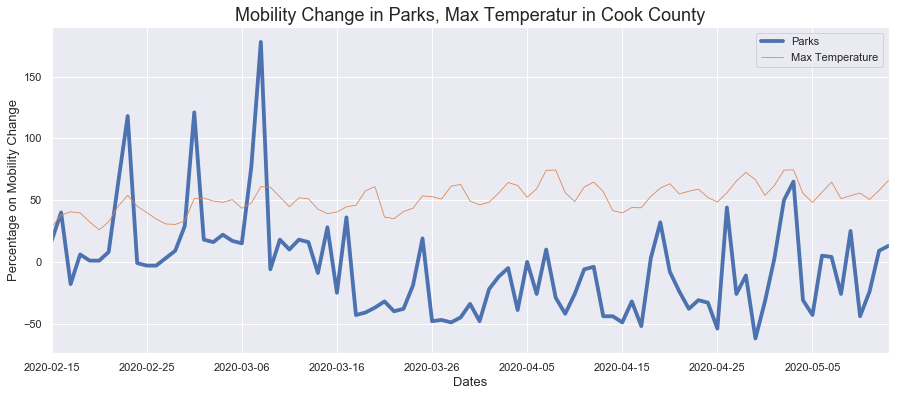

In [60]:
fig, ax = plt.subplots()
df_cook_parks = df_cook[["Parks", "Max Temperature"]]
df_cook_parks[['Parks']].plot(ax=ax, linewidth=3.8)
df_cook_parks[['Max Temperature']].plot(ax=ax, linewidth=0.8)
plt.xlabel("Dates", fontsize=13)
plt.ylabel("Percentage on Mobility Change", fontsize=13)
plt.title('Mobility Change in Parks, Max Temperatur in Cook County', fontsize=18)

In [19]:
with_pca = pd.read_csv('../output/model_validation_results_with_pca.csv')
without_pca = pd.read_csv('../output/model_validation_results_without_pca.csv')
with_pca['PCA'] = 'with_pca'
without_pca['PCA'] = 'without_pca'

In [25]:
with_pca_min = with_pca.groupby('Model').min()
without_pca_min = without_pca.groupby('Model').min()
mae = pd.concat([with_pca_min, without_pca_min])
mae

,Unnamed: 0,Parameters,MSE,MAE,PCA
Model,,,,,
AdaBoostRegressor,0,{'n_estimators': 100},284.019318,12.919368,with_pca
KNeighborsRegressor,0,{'n_neighbors': 10},111.779843,7.938114,with_pca
Lasso,0,"{'alpha': 0.01, 'random_state': 0, 'max_iter':...",186.775113,10.887718,with_pca
LinearRegression,0,{},202.228754,11.887033,with_pca
LinearSVR,0,"{'C': 0.01, 'epsilon': 0.01, 'random_state': 0...",186.267439,11.228565,with_pca
RandomForestRegressor,0,"{'n_estimators': 100, 'max_features': 'auto', ...",123.270674,8.482571,with_pca
Ridge,0,"{'alpha': 0.01, 'random_state': 0, 'max_iter':...",200.991213,11.840277,with_pca
AdaBoostRegressor,0,{'n_estimators': 100},209.835539,11.122671,without_pca
Lasso,0,"{'alpha': 0.01, 'random_state': 0, 'max_iter':...",187.508808,11.112260,without_pca


Text(0.5,1,'MAE Comparison Between Models')

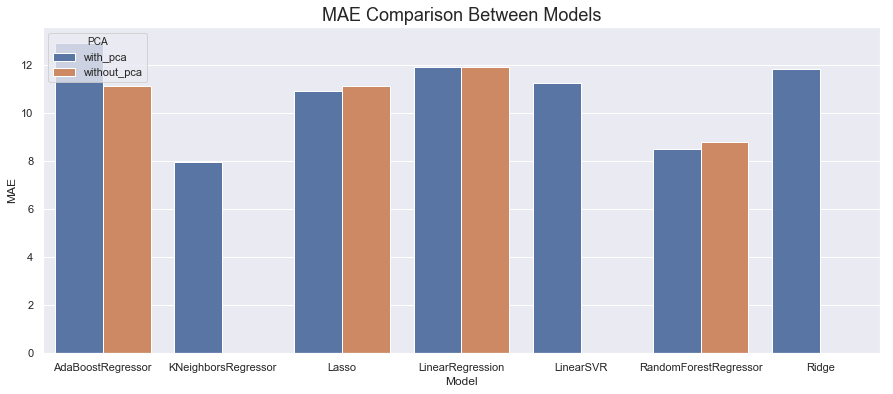

In [30]:
sns.set(rc={'figure.figsize':(15, 6)})
ax = sns.barplot(x=mae.index, y='MAE', hue="PCA", data=mae)
plt.title('MAE Comparison Between Models', fontsize=18)